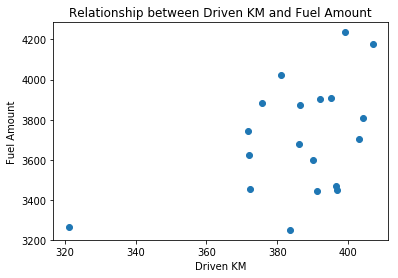

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(15, 1) (4, 1) (15,) (4,)
Predicted cost for 800 km: [6905.64571567]
MSE: 46181.36710639155
R-squared: -0.6180990161577022
Coefficients: [7.63373063]
Intercept: 798.6612098962887
MSE (scaled): 46181.36710639172


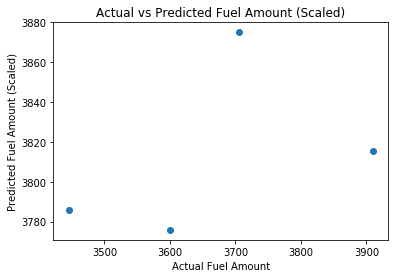

MSE (MinMax scaled): 46181.3671063917
MSE (KNN Regressor): 21241.836200000045
MSE (SGD Regressor): 3.7316635429916255e+28
Model with lowest MSE: KNN Regressor


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor

# Step 2: Import Dataset
fuel_data = pd.read_csv('fuel_data.csv')....
# Step 3: Preprocessing
missing_values = fuel_data.isnull().sum()

# Step 4: Visualize Relationship
plt.scatter(fuel_data['drivenKM'], fuel_data['fuelAmount'])
plt.xlabel('Driven KM')
plt.ylabel('Fuel Amount')
plt.title('Relationship between Driven KM and Fuel Amount')
plt.show()

# Step 5: Prepare X and y
X = fuel_data[['drivenKM']]
y = fuel_data['fuelAmount']

# Step 6: Examine X and y
print(type(X))
print(type(y))

# Step 7: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Part 1: Linear Regression Baseline Model

# Step 8: Build Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Predict for 800 km
predicted_cost = model.predict([[800]])
print("Predicted cost for 800 km:", predicted_cost)

# Step 10: Predict on Entire Dataset
y_pred = model.predict(X_test)

# Step 11: Print Errors and Model Parameters
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Part 2: Linear Regression with Scaling using StandardScaler

# Step 12: Normalize X_train and X_test Values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 13: Build LR Model on Scaled Data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Step 14: Print Errors
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print("MSE (scaled):", mse_scaled)

# Step 15: Plot Scatter Plot
plt.scatter(y_test, y_pred_scaled)
plt.xlabel('Actual Fuel Amount')
plt.ylabel('Predicted Fuel Amount (Scaled)')
plt.title('Actual vs Predicted Fuel Amount (Scaled)')
plt.show()

# Part 3: Comparison with other Models

# Step 16: Repeat with MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

model_minmax = LinearRegression()
model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = model_minmax.predict(X_test_minmax)

mse_minmax = mean_squared_error(y_test, y_pred_minmax)
print("MSE (MinMax scaled):", mse_minmax)

# Step 17: Compare KNN Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
print("MSE (KNN Regressor):", mse_knn)

# Step 18: Compare SGD Regressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)  # Set max_iter and tol here
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print("MSE (SGD Regressor):", mse_sgd)

# Step 19: Select best model
mse_values = {
    'Linear Regression': mse,
    'Linear Regression (Scaled)': mse_scaled,
    'Linear Regression (MinMax Scaled)': mse_minmax,
    'KNN Regressor': mse_knn,
    'SGD Regressor': mse_sgd
}

best_model = min(mse_values, key=mse_values.get)
print("Model with lowest MSE:", best_model)

